In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
iterations = 1000
n = 1000
secret_beta = 2
sigma_eps = 1

In [41]:
mse_beta_normal = np.array([])
mse_s2_normal = np.array([])
mse_beta_t = np.array([])
mse_s2_t = np.array([])

for df in range(3, 31):
    errors_beta_normal = np.array([])
    errors_s2_normal = np.array([])
    errors_beta_t = np.array([])
    errors_s2_t = np.array([])

    for _ in range(iterations):
        x = np.linspace(-10,10,n)
        
        # normal distributed errors
        y_normal = x*secret_beta + np.random.normal(scale=np.sqrt(df/(df-2)), size=n)
        beta_est_normal = np.cov(x, y_normal)[0][1]/np.var(x)
        errors_beta_normal = np.append(errors_beta_normal, (beta_est_normal-secret_beta)**2)
        
        s2_est_normal = sum((y_normal - x*beta_est_normal)**2)/(n-1)
        errors_s2_normal = np.append(errors_s2_normal, (s2_est_normal-df/(df-2))**2)
        
        # t distributed errors
        y_t = x*secret_beta + np.random.standard_t(df=df, size=n)
        beta_est_t = np.cov(x, y_t)[0][1]/np.var(x)
        errors_beta_t = np.append(errors_beta_t, (beta_est_t-secret_beta)**2)
        
        s2_est_t = sum((y_t - x*beta_est_t)**2)/(n-1)
        errors_s2_t = np.append(errors_s2_t, (s2_est_t-df/(df-2))**2)

    print("var=%f, df=%f  beta: normal mse=%f;    t mse=%f;   "%(df/(df-2), df, errors_beta_normal.mean(), errors_beta_t.mean()))
    print("                 s2:   normal mse=%f;  t mse=%f;   "%(errors_s2_normal.mean(), errors_s2_t.mean()))
    
    mse_beta_normal = np.append(mse_beta_normal, errors_beta_normal.mean())
    mse_beta_t = np.append(mse_beta_t, errors_beta_t.mean())
    
    mse_s2_normal = np.append(mse_s2_normal, errors_s2_normal.mean())
    mse_s2_t = np.append(mse_s2_t, errors_s2_t.mean())

var=3.000000, df=3.000000  beta: normal mse=0.000097;    t mse=0.000089;   
                 s2:   normal mse=0.016885;  t mse=0.583160;   
var=2.000000, df=4.000000  beta: normal mse=0.000066;    t mse=0.000062;   
                 s2:   normal mse=0.007471;  t mse=0.123814;   
var=1.666667, df=5.000000  beta: normal mse=0.000055;    t mse=0.000054;   
                 s2:   normal mse=0.005966;  t mse=0.020418;   
var=1.500000, df=6.000000  beta: normal mse=0.000044;    t mse=0.000052;   
                 s2:   normal mse=0.004451;  t mse=0.010609;   
var=1.400000, df=7.000000  beta: normal mse=0.000042;    t mse=0.000047;   
                 s2:   normal mse=0.003821;  t mse=0.009585;   
var=1.333333, df=8.000000  beta: normal mse=0.000042;    t mse=0.000048;   
                 s2:   normal mse=0.003712;  t mse=0.005963;   
var=1.285714, df=9.000000  beta: normal mse=0.000045;    t mse=0.000042;   
                 s2:   normal mse=0.003243;  t mse=0.005389;   
var=1.250000, df=10.

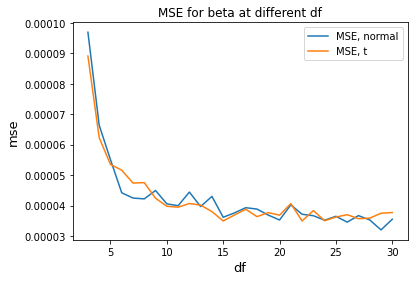

In [44]:
# plot results

plt.plot(np.linspace(3,30,30-3+1), mse_beta_normal, label="MSE, normal")
plt.plot(np.linspace(3,30,30-3+1), mse_beta_t, label="MSE, t")
plt.xlabel("df",fontsize=13)
plt.ylabel("mse",fontsize=13)
plt.title("MSE for beta at different df")
plt.legend()

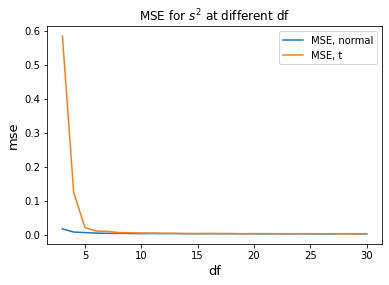

In [45]:
# plot results

plt.plot(np.linspace(3,30,30-3+1), mse_s2_normal, label="MSE, normal")
plt.plot(np.linspace(3,30,30-3+1), mse_s2_t, label="MSE, t")
plt.xlabel("df",fontsize=13)
plt.ylabel("mse",fontsize=13)
plt.title("MSE for $s^2$ at different df")
plt.legend()